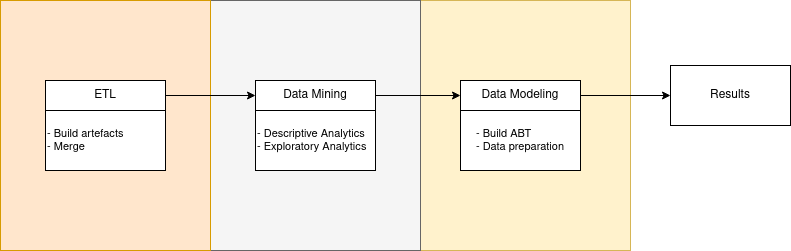

In [4]:
from IPython.display import Image
Image(filename='data_flow.drawio.png')

# 0. Libraries and Loading

## 0.1. Libraries

In [5]:
from utils import *
import pandas as pd
from datetime import datetime
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set()

## 0.2. Loading

### 0.3.1. Defining Global Parameters

In [6]:
########################################################################################################
######################### input parameters for the create_df_modeling function #########################
########################################################################################################

# Define the range of dates for the trasactional dataset
start_date = datetime(2023, 1, 1).strftime('%Y-%m-%d')
end_date = datetime(2023, 12, 31).strftime('%Y-%m-%d')
# defines the minimum id_user to consider
low_user = 1
# defines the maximum id_user to consider
high_user = 500
# defines the daily audience (the percentage of the sample size of users) for each id_date
dau = 0.1
# defines the minimum id_track available
low_track = 1
# defines the maximum id_track available
high_track = 1000
# defines the minimum number of plays a listener can hit play every day
min_plays = 1
# defines the maximum number of plays a listener can hit play every day
max_plays = 30
# defines the minimum number of tracks a listener can listen to every day
min_n_tracks = 2
# defines the maximum number of tracks a listener can listen to every day
max_n_tracks = 8


########################################################################################################
################ input parameters for the create_dim_content function ##################################
########################################################################################################

# defines the total number of tracks
n_tracks = high_track
# defines the total number of id_artist
n_artists = 400
# defines the total number of genres
n_genres = 8
# defines the minimum number of tracks by id_artist
min_tracks = 2 * round((n_tracks / n_artists), 0) * 0.2
# defines the maximum number of tracks by id_artist
max_tracks = 2 * round((n_tracks / n_artists), 0) * 0.8


########################################################################################################
################ input parameters for the creates_features function ####################################
########################################################################################################

# number of features that are going to appear on the final dataframe
n_features = 10
# maximum standard deviation value for each of the feature
std_max = 1
# minimum value for the mean value for each of the features
min_mean = 100
# maximum value for the mean value for each of the features
max_mean = 1500

### 0.3.2 Creates Data Transactional

In [7]:
# create data_transactional_
data_transactional = create_df_modeling(start_date, end_date, low_user, high_user, dau, low_track, high_track, min_plays, max_plays, min_n_tracks, max_n_tracks)

data_transactional_columns = data_transactional.columns

# checking
data_transactional.head()

,id_date,user_id,id_tracks,plays
0,2023-01-01,241,707,24
1,2023-01-01,241,350,4
2,2023-01-01,241,964,7
3,2023-01-01,241,467,12
4,2023-01-01,241,813,1


### 0.3.3. Creates Data Dimensional

In [8]:
# create data_dimensional_
data_dimensional = create_dim_content(n_tracks, min_tracks, max_tracks, n_artists, n_genres)

data_dimensional_columns = data_dimensional.columns

# checking
data_dimensional.head()

,id_artist,id_tracks,id_genre
0,1,NaN,NaN
1,2,944,5
2,2,241,7
3,3,192,1
4,4,572,5


### 0.3.4. Creates Data Features

In [9]:
# create data_features_
data_features = creates_features(n_features,n_artists,std_max, min_mean, max_mean)

data_features_columns = data_features.columns

# checking
data_features.head()

,id_artist,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,1,88,442,1114,1846,691,-252,236,335,1368,90
1,2,94,491,800,-283,1771,465,974,1039,1306,161
2,3,378,756,897,1701,102,158,3335,1441,1234,163
3,4,388,544,1156,805,1721,809,717,1767,1237,147
4,5,407,521,886,1270,303,243,1299,-130,1378,128


### 0.3.5. Saving Bronze

In [10]:
# saving data transactional
data_transactional.to_parquet('dados/bronze/data_transactional.parquet')

# saving data dimensional
data_dimensional.to_parquet('dados/bronze/data_dimensional.parquet')

# saving data features
data_features.to_parquet('dados/bronze/data_features.parquet')